In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()

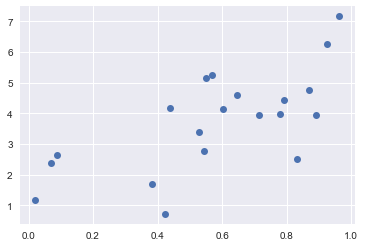

In [2]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20,1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)
plt.plot(X.squeeze(), y, 'o')

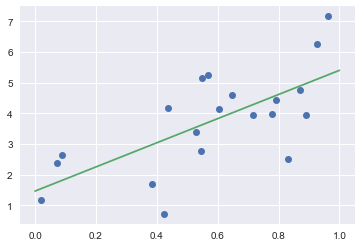

In [3]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)